In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Boston House Pricing Dataset

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Preparing the dataset

In [6]:
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)

In [7]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
dataset['Price'] = boston.target


In [9]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
##summarise the stats of the data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
## check the missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Analysing The Correlated Features

In [13]:
#import seaborn as sns
#sns.pairplot(dataset)

In [14]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

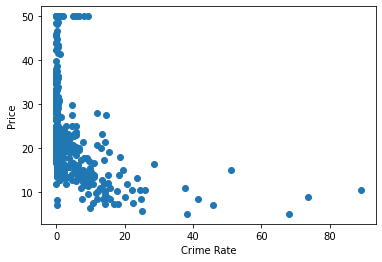

In [15]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

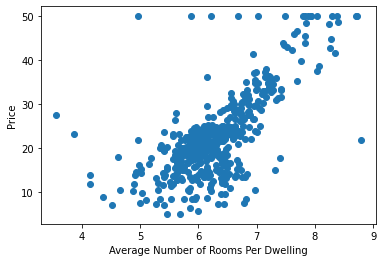

In [16]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel("Average Number of Rooms Per Dwelling")
plt.ylabel("Price")

<AxesSubplot:xlabel='RM', ylabel='Price'>

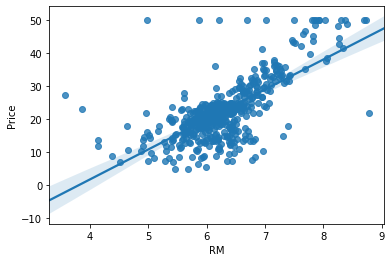

In [17]:
import seaborn as sns
sns.regplot(x='RM',y='Price',data=dataset)

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

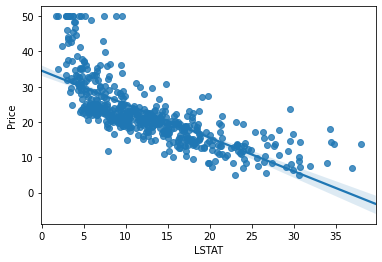

In [18]:
import seaborn as sns
sns.regplot(x='LSTAT',y='Price',data=dataset)

#LSTAT    % lower status of the population

<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

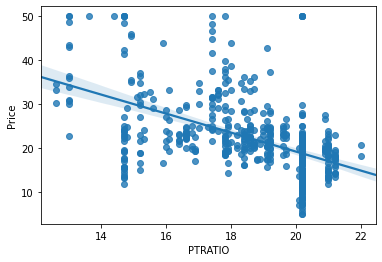

In [19]:
#PTRATIO  pupil-teacher ratio by town
import seaborn as sns
sns.regplot(x='PTRATIO',y='Price',data=dataset)

In [20]:
# Independent and dependent features
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [21]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [23]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [24]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
229,0.44178,0.0,6.20,0.0,0.5040,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76
286,0.01965,80.0,1.76,0.0,0.3850,6.230,31.5,9.0892,1.0,241.0,18.2,341.60,12.93
118,0.13058,0.0,10.01,0.0,0.5470,5.872,73.1,2.4775,6.0,432.0,17.8,338.63,15.37
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73
440,22.05110,0.0,18.10,0.0,0.7400,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0.0,0.5730,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
320,0.16760,0.0,7.38,0.0,0.4930,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
226,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
464,7.83932,0.0,18.10,0.0,0.6550,6.209,65.4,2.9634,24.0,666.0,20.2,396.90,13.22


In [25]:
#standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train

array([[-0.37653282, -0.49210795, -0.70742811, ..., -0.47410263,
         0.28585164, -1.19290712],
       [-0.42171731,  2.95776789, -1.36050673, ..., -0.10599017,
        -0.11311575,  0.05884109],
       [-0.40984344, -0.49210795, -0.14701604, ..., -0.2900464 ,
        -0.14370256,  0.39191259],
       ...,
       [-0.38291664, -0.49210795, -0.70742811, ..., -0.47410263,
         0.35835371, -1.27890509],
       [ 0.41529452, -0.49210795,  1.04294028, ...,  0.81429099,
         0.45639629,  0.09842746],
       [-0.42167021,  3.60461961, -1.22518413, ..., -1.71648219,
         0.39100025, -1.31303127]])

## Model training

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regression = LinearRegression()

In [30]:
regression.fit(X_train, y_train)

LinearRegression()

In [31]:
#coefficient and intercept
print(regression.coef_)
print(regression.intercept_)

[-0.96498315  1.01864189  0.27723394  0.79318293 -2.3898781   2.99539209
  0.2409815  -3.07790031  3.11186573 -2.37989115 -2.18015222  1.06779314
 -3.69685117]
22.85778364116095


In [32]:
#on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [33]:
##Prediction with the test data
reg_pred = regression.predict(X_test)

In [34]:
reg_pred

array([14.47822929, 14.50424759, 19.59270185, 27.15115467, 22.64603603,
       32.68419461, 25.34085812, 21.47729633, 33.45162274, 22.92180819,
       26.97108857, 24.80627379,  8.43025794, 13.47521379, 20.64089807,
       11.50391366, 19.49983602, 18.18517248, 23.38948758, 18.50280381,
       35.34840511, 30.9591785 , 19.20955057, 23.7626903 , 21.70549999,
       21.17582838, 24.12122082, 38.74704052, 16.95190966, 30.39736018,
       20.81038508, 22.39201726, 18.49937735, 13.84520702, 23.02669083,
       20.42169459, 19.94668044, 18.58710648, 17.32591366, 20.5293724 ,
       21.43887115, 26.85952597, 17.77988673, 28.95799842, 29.11775802,
       21.24969378, 17.64414007, 12.09469019, 22.10014148, 28.29251899,
       21.07435005, 17.51550029,  9.87512474, 35.62908256, 13.72287182,
       28.52796734, 20.09884086, 16.80708569, 29.2130155 , 19.41931404,
       21.01746702, 23.94481976, 25.12793453, 28.85875549, 20.60018045,
        7.80856201, 23.98692389, 42.37177684, 24.7977155 , 20.19

## Assumptions

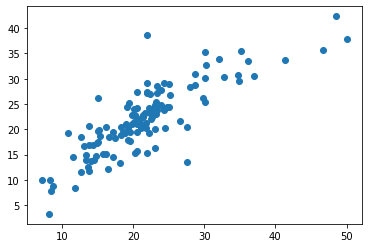

In [35]:
#plot a scatter plot for the prediction
plt.scatter(y_test, reg_pred)

In [36]:
## Residuals
residuals = y_test - reg_pred

In [37]:
residuals

346     2.721771
389    -3.004248
10     -4.592702
285    -5.151155
358     0.053964
         ...    
495     6.757796
375   -11.214520
355     4.964390
473     3.684061
145     2.044256
Name: Price, Length: 127, dtype: float64

<AxesSubplot:>

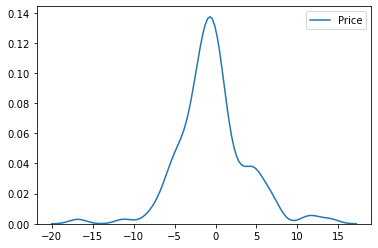

In [38]:
##plot residuals
sns.kdeplot(residuals)

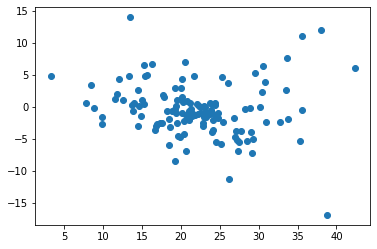

In [39]:
##Scatter plot respect to prediction and residuals
plt.scatter(reg_pred, residuals)

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_absolute_error(reg_pred,y_test))
print(mean_squared_error(reg_pred,y_test))
print(np.sqrt(mean_squared_error(reg_pred,y_test)))

2.9871825679772566
17.451946708952786
4.177552717674881


## R square and adjusted R square

Formula - R^2 = 1-SSR/SST
* R^2 =  coefficient of determination
* SSR = sum of squares of residuals
* SST = total sum of squares

In [41]:
from sklearn.metrics import r2_score

In [42]:
score = r2_score(y_test,reg_pred)

In [43]:
print(score)

0.6871791249907904


Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
where:
* n: the number of observations
* k: the number of predictor variables

In [44]:
#display adjusted R squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6511908827330937

## New Data prediction

In [45]:
boston.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [46]:
##transformation of new data
scaler.transform(boston.data[0].reshape(1,-1))


array([[-0.42314414,  0.28411412, -1.27960735, -0.27695585, -0.14954459,
         0.36424602, -0.12758119,  0.15954813, -1.00992819, -0.68492889,
        -1.44039785,  0.45639629, -1.02637137]])

In [47]:
regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([29.81698985])

## Pickling the model for deployment

In [48]:
import pickle

In [59]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [49]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))


In [50]:
## Prediction
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([29.13937872])